<a href="https://colab.research.google.com/github/badgujjarajay/fruits-classification/blob/master/face_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [4]:
!kaggle datasets download -d badgujjarajay/face-data

 95% 159M/167M [00:04<00:00, 26.6MB/s]
100% 167M/167M [00:05<00:00, 34.6MB/s]


In [5]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: face_data/Not-Ajay/Sophie Turner13_844.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner141_854.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner142_855.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner143_856.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner146_857.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner147_858.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner148_859.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner14_853.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner150_861.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner152_862.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner153_863.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner154_864.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner155_865.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner156_866.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner157_867.jpg  
  inflating: face_data/Not-Ajay/Sophie Turner158_868.jpg  
  infla

In [6]:
path = 'face_data'
classes = os.listdir(path)

In [7]:
for c in classes:
    print(c)
    verify_images(path + '/' +c, delete=True, max_size=2000)

Not-Ajay


Ajay


In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("face_data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms())

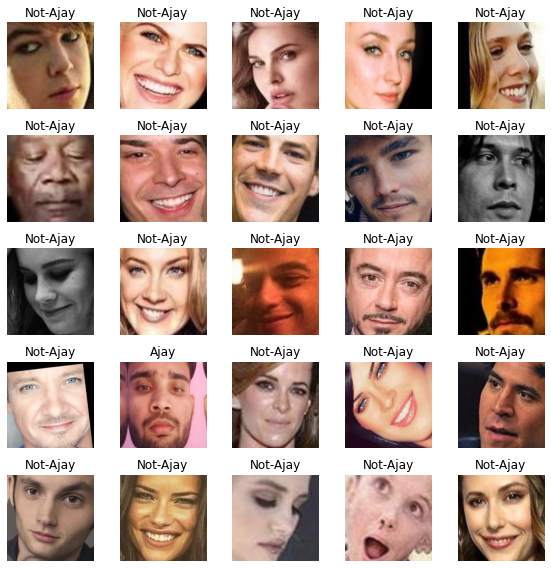

In [9]:
data.show_batch(rows=5,figsize=(8,8))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [11]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.088960,0.017757,0.995985,02:48
1,0.004201,0.000096,1.000000,02:49
2,0.004115,0.000804,0.999732,02:50
3,0.003739,0.000025,1.000000,02:50
4,0.006459,0.000007,1.000000,02:49
5,0.002041,0.000006,1.000000,02:48


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

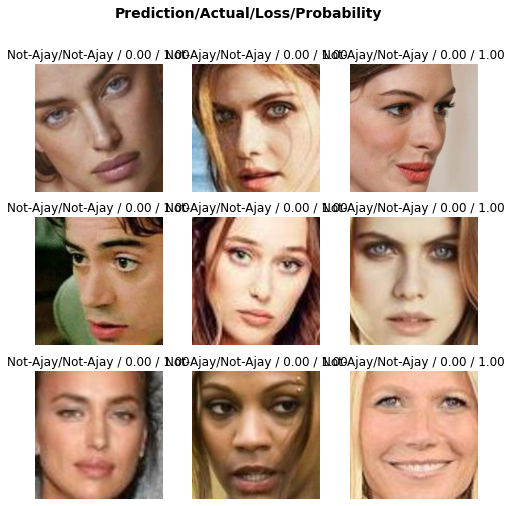

In [13]:
interp.plot_top_losses(9, figsize=(8,8))

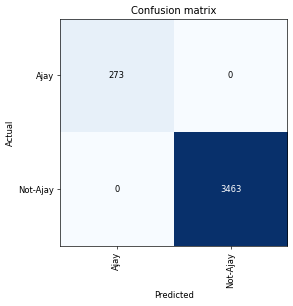

In [16]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
dir = "/content/drive/My Drive/dl_projects/face_unlock"
os.makedirs(dir, exist_ok=True)

In [20]:
learn.save(dir+"/Stage-1")

In [21]:
learn.export(dir+"/export.pkl")

In [22]:
!pip install -U kora
from kora.drive import upload_public
url = upload_public(dir+"/export.pkl")
url

'https://drive.google.com/uc?id=18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1'

In [23]:
url

'https://drive.google.com/uc?id=18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1'